In [1]:
# Import Neccessary Lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data.
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Exploratory Data Analysis

In [3]:
# Size of data.
df.shape

(1000, 40)

##### This dataset contains 1000 rows and 40 columns, out of which one column represents the target variable and the remaining columns are independent variables.

In [4]:
# Sum of nulls in each columns.
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
# analysing the dataset.
df['auto_make'].value_counts()

auto_make
Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: count, dtype: int64

In [6]:
# Fetching all the columns.
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
# Removing all the Nans columns and columns which are not important.
df.drop(['policy_number', 'policy_bind_date', '_c39', 'months_as_customer', 'age', 'umbrella_limit', 'insured_zip', 'insured_hobbies', 'auto_model', 'auto_make'], axis= 1, inplace=True)

In [8]:
# Displaying the dataset.
df

,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,OH,250/500,1000,1406.91,MALE,MD,craft-repair,husband,53300,0,...,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,IN,250/500,2000,1197.22,MALE,MD,machine-op-inspct,other-relative,0,0,...,?,0,0,?,5070,780,780,3510,2007,Y
2,OH,100/300,2000,1413.14,FEMALE,PhD,sales,own-child,35100,0,...,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,IL,250/500,2000,1415.74,FEMALE,PhD,armed-forces,unmarried,48900,-62400,...,?,1,2,NO,63400,6340,6340,50720,2014,Y
4,IL,500/1000,1000,1583.91,MALE,Associate,sales,unmarried,66000,-46000,...,NO,0,1,NO,6500,1300,650,4550,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,1000,1310.80,FEMALE,Masters,craft-repair,unmarried,0,0,...,YES,0,1,?,87200,17440,8720,61040,2006,N
996,IL,100/300,1000,1436.79,FEMALE,PhD,prof-specialty,wife,70900,0,...,YES,2,3,?,108480,18080,18080,72320,2015,N
997,OH,250/500,500,1383.49,FEMALE,Masters,armed-forces,other-relative,35100,0,...,?,2,3,YES,67500,7500,7500,52500,1996,N
998,IL,500/1000,2000,1356.92,MALE,Associate,handlers-cleaners,wife,0,0,...,?,0,1,YES,46980,5220,5220,36540,1998,N


In [9]:
# Again finding the unique value of each columns.
for col in df.columns:
    print(f'{col}', df[col].unique(), '\n')

policy_state ['OH' 'IN' 'IL'] 

policy_csl ['250/500' '100/300' '500/1000'] 

policy_deductable [1000 2000  500] 

policy_annual_premium [1406.91 1197.22 1413.14 1415.74 1583.91 1351.1  1333.35 1137.03 1442.99
 1315.68 1253.12 1137.16 1215.36  936.61 1301.13 1131.4  1199.44  708.64
 1374.22 1475.73 1187.96  875.15  972.18 1268.79  883.31 1266.92 1322.1
  848.07 1291.7  1104.5   954.16 1337.28 1088.34 1558.29 1415.68 1334.15
  988.45 1222.48 1155.55 1262.08 1451.62 1737.66 1475.93  538.17 1081.08
 1454.43 1240.47 1273.7  1123.87 1245.89 1326.62 1073.83 1530.52 1201.41
 1393.57 1276.57 1082.49 1414.74 1470.06  870.63  795.23 1168.2   993.51
 1848.81 1641.73 1362.87 1239.22  835.02 1061.33 1279.08 1105.49 1055.53
  895.83 1632.93 1405.99 1425.54 1038.09 1307.11 1489.24  976.67 1340.43
 1267.81 1234.2  1318.06  769.95 1514.72  873.64 1612.43 1318.24 1226.83
 1326.44 1136.83 1322.78 1483.25 1515.3  1075.18 1690.27 1352.83 1148.73
  969.5  1463.82 1474.17 1497.35 1427.14 1495.1  1141.62 1125

In [10]:
# Sum of nulls in each columns.
df.isna().sum()

policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_available         0
total_claim_amount              0
injury_claim                    0
property_claim                  0
vehicle_claim                   0
auto_year                       0
fraud_reported

In [11]:
# fetching sum of '?' symbol.
(df == '?').sum()

policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
auto_year           

In [12]:
# Replacing the '?' symbol with Nans.
df.replace('?', np.nan, inplace=True)

In [13]:
# fetching sum of 0
(df == 0).sum()

policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                  508
capital-loss                   475
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day        52
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries                340
witnesses                      249
police_report_available          0
total_claim_amount               0
injury_claim                    25
property_claim                  19
vehicle_claim                    0
auto_year           

In [14]:
# Replacing the zerso into NaNs.
df.replace(0, np.nan, inplace= True)

In [15]:
# Now checking all the null values.
df.isna().sum()

policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                  508
capital-loss                   475
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day        52
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                340
witnesses                      249
police_report_available        343
total_claim_amount               0
injury_claim                    25
property_claim                  19
vehicle_claim                    0
auto_year           

In [16]:
# Fill missing values based on column type
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical columns
        # Fill with the mode (most frequent value)
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
    else:  # Numerical columns
        # Fill with the median (could use mean as well)
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

In [17]:
# checking again all the null values.
df.isna().sum()

policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_year                      0
fraud_reported                 0
dtype: int

In [18]:
# Data Type.
df.dtypes

policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_relationship            object
capital-gains                  float64
capital-loss                   float64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day       float64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                float64
witnesses                      float64
police_report_available         object
total_claim_amount               int64
injury_claim             

In [19]:
# Separating numerical columns and category columns in different list.
num_df = []
cat_df = []
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        num_df.append(df[col])
    else:
        cat_df.append(df[col])
        
# Convert the lists of series back to DataFrames
num_df = pd.DataFrame(num_df).T
cat_df = pd.DataFrame(cat_df).T

In [20]:
# displaying the numeric size.
num_df.shape

(1000, 13)

In [21]:
# Observing the non-null values present in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   policy_state                 1000 non-null   object 
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   insured_sex                  1000 non-null   object 
 5   insured_education_level      1000 non-null   object 
 6   insured_occupation           1000 non-null   object 
 7   insured_relationship         1000 non-null   object 
 8   capital-gains                1000 non-null   float64
 9   capital-loss                 1000 non-null   float64
 10  incident_date                1000 non-null   object 
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

<Axes: >

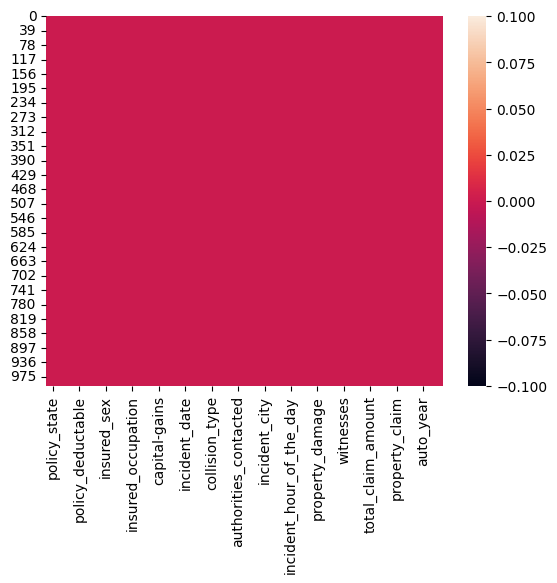

In [22]:
# The presence of non-null values is represented by the heatmap.
sns.heatmap(df.isnull())

In [23]:
# Short information.
df.describe()

,policy_deductable,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1136.000000,1256.406150,51186.500000,-50828.700000,12.320000,1.83900,1.67200,1.985000,52761.94000,7605.170000,7528.77000,37928.950000,2005.103000
std,611.864673,244.167395,11152.039981,11819.760279,6.395506,1.01888,0.46972,0.708009,26401.53319,4734.905628,4714.52542,18886.252893,6.015861
min,500.000000,433.330000,800.000000,-111100.000000,1.000000,1.00000,1.00000,1.000000,100.00000,10.000000,20.00000,70.000000,1995.000000
25%,500.000000,1089.607500,51300.000000,-51500.000000,7.000000,1.00000,1.00000,1.000000,41812.50000,4725.000000,4747.50000,30292.500000,2000.000000
50%,1000.000000,1257.200000,51300.000000,-50600.000000,13.000000,1.00000,2.00000,2.000000,58055.00000,6870.000000,6800.00000,42100.000000,2005.000000
75%,2000.000000,1415.695000,51300.000000,-49850.000000,17.000000,3.00000,2.00000,2.000000,70592.50000,11305.000000,10885.00000,50822.500000,2010.000000
max,2000.000000,2047.590000,100500.000000,-5700.000000,23.000000,4.00000,2.00000,3.000000,114920.00000,21450.000000,23670.00000,79560.000000,2015.000000


#### We can observe the data, which shows that there are non-null columns present, along with skewness and outliers. Let's take a closer look and examine these observations further.

# Encoding categorial columns using OrdinalEncodes

In [24]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

#### Distribution and Skewness

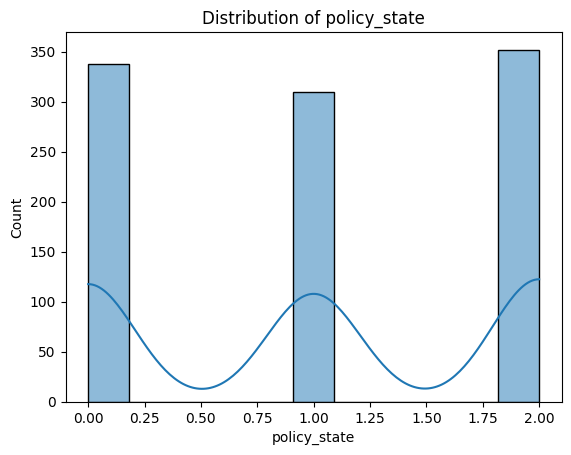

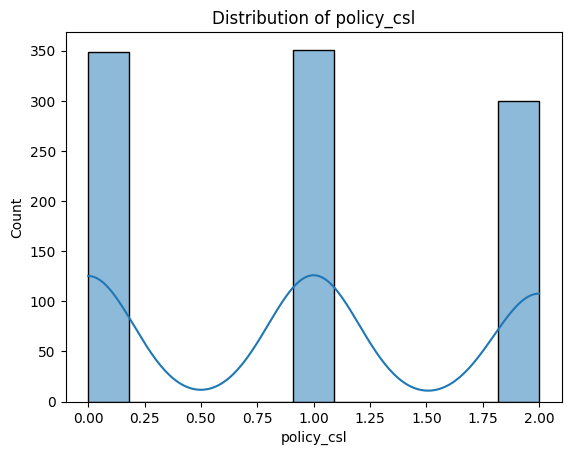

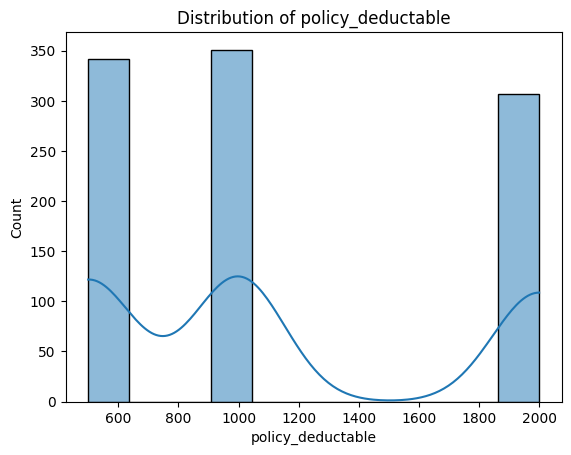

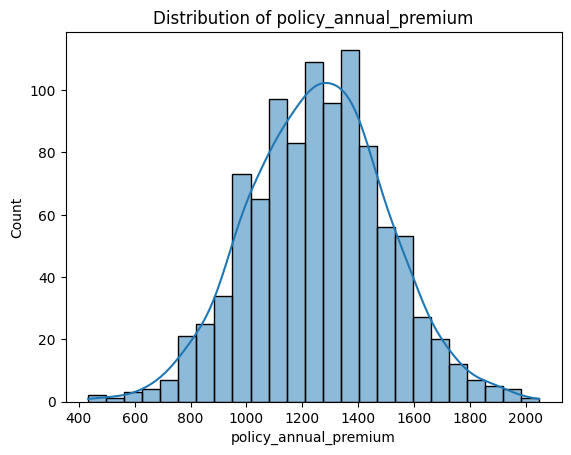

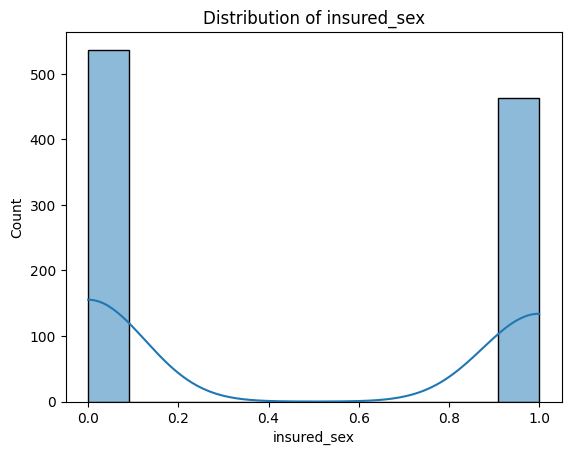

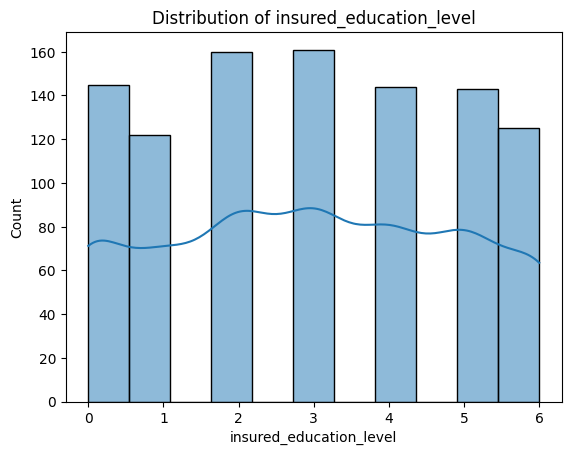

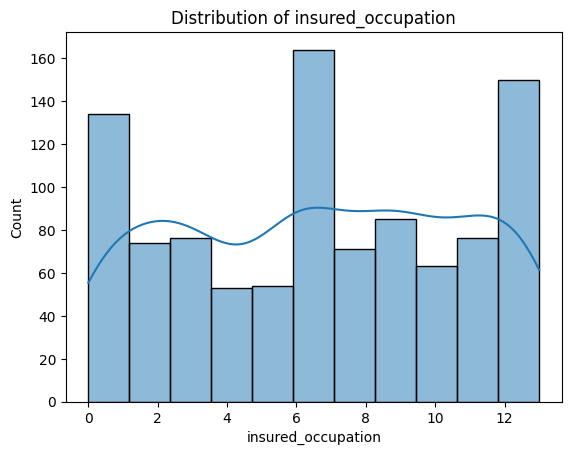

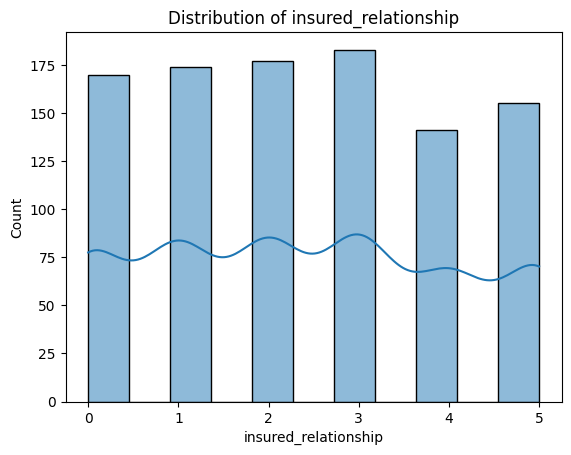

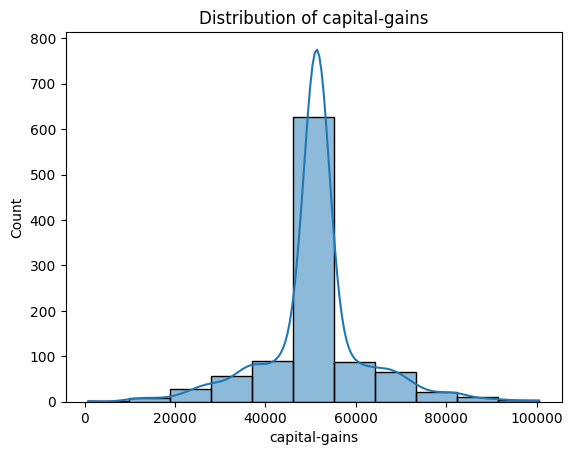

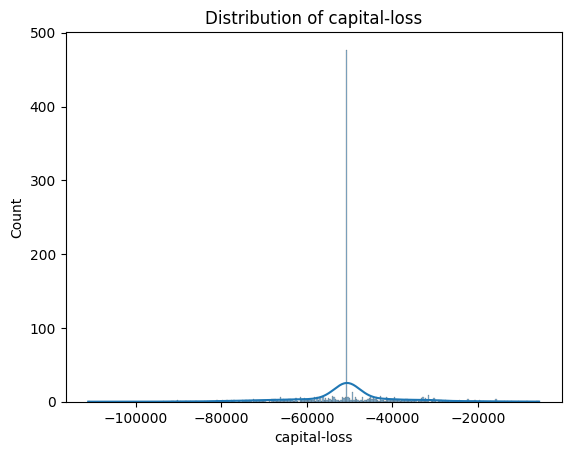

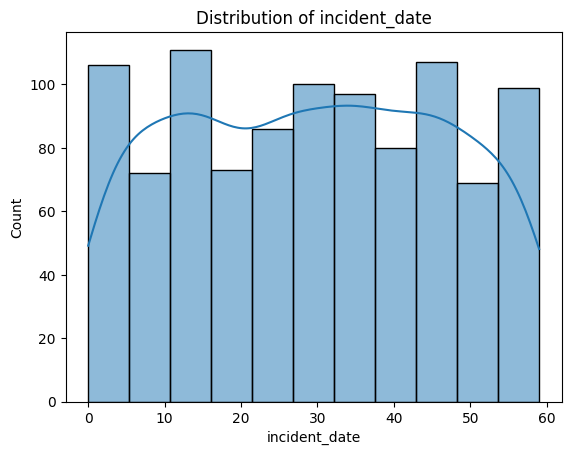

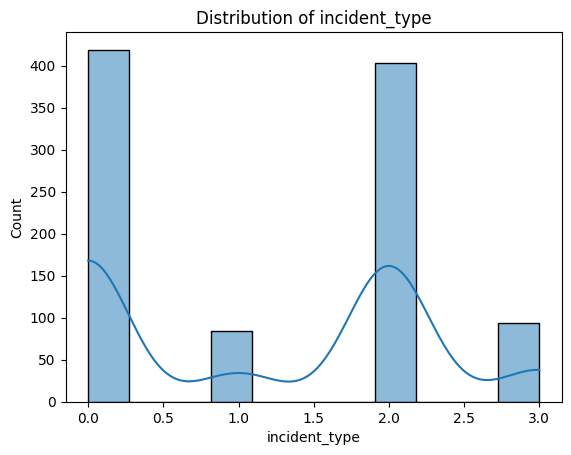

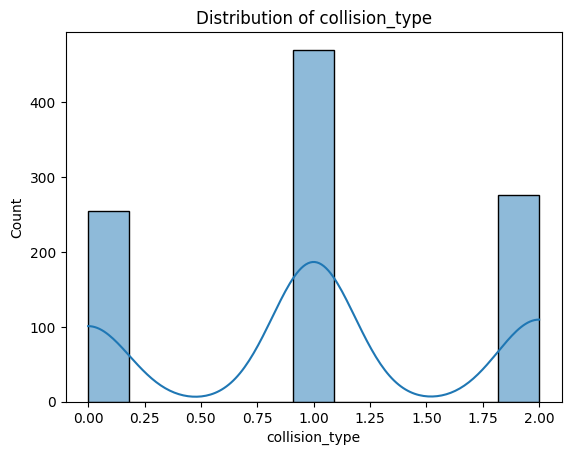

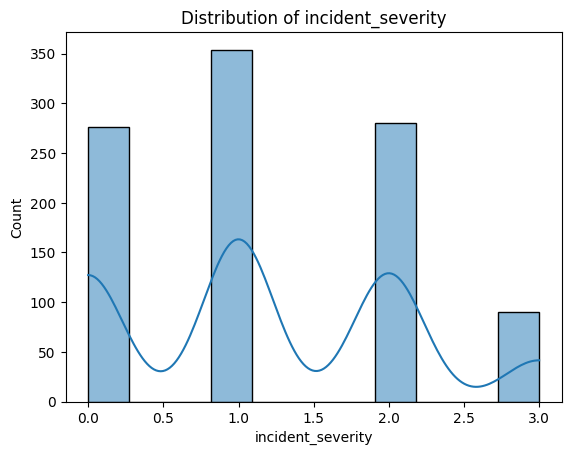

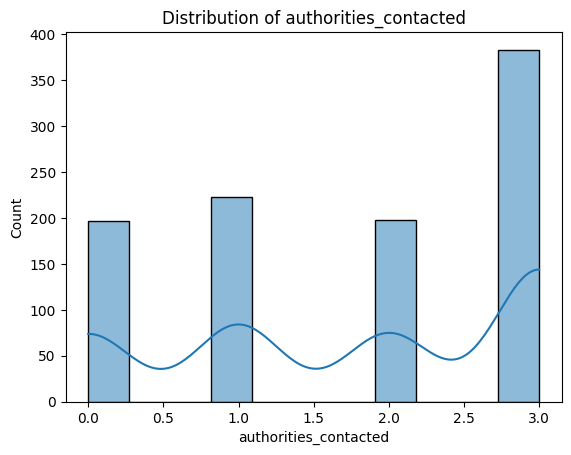

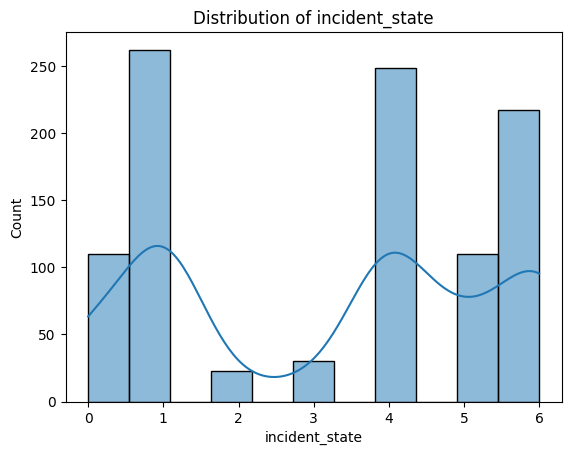

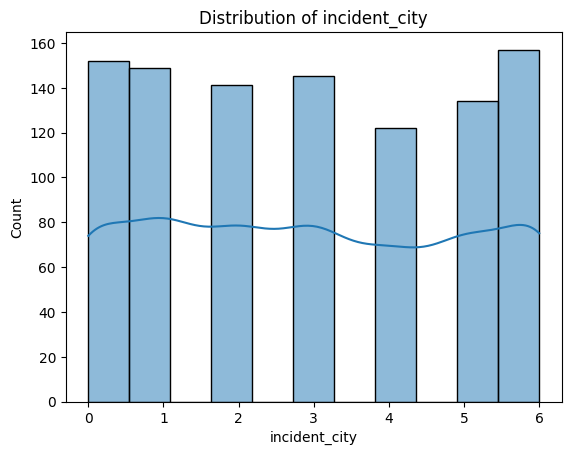

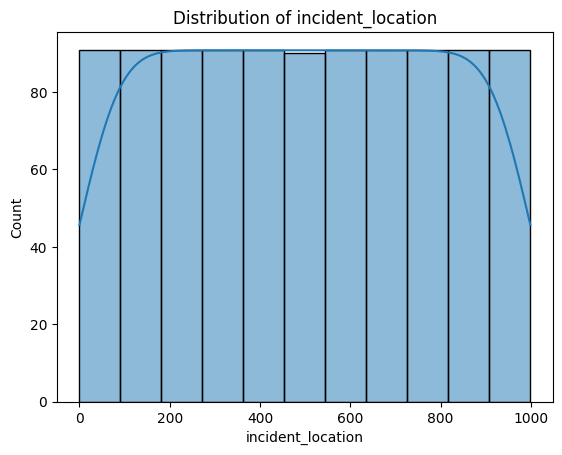

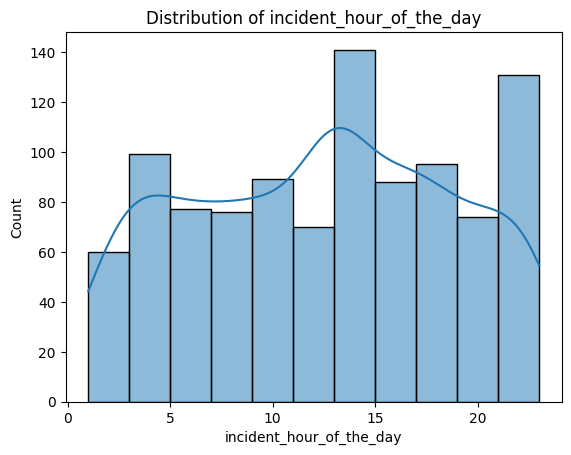

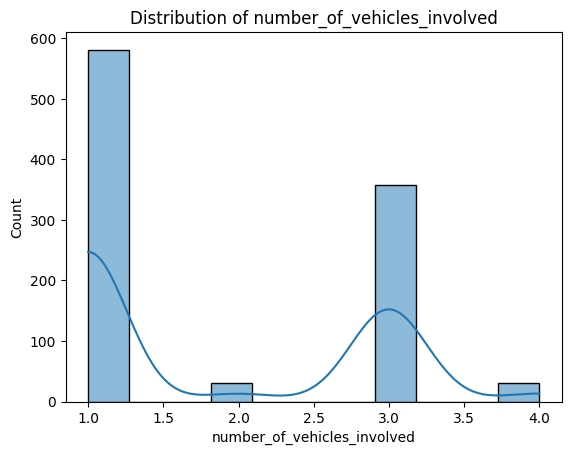

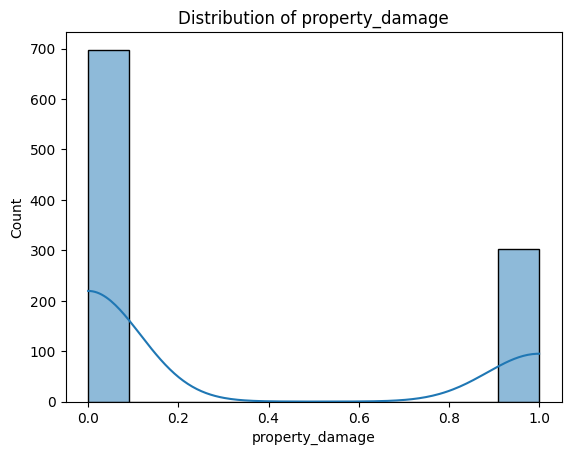

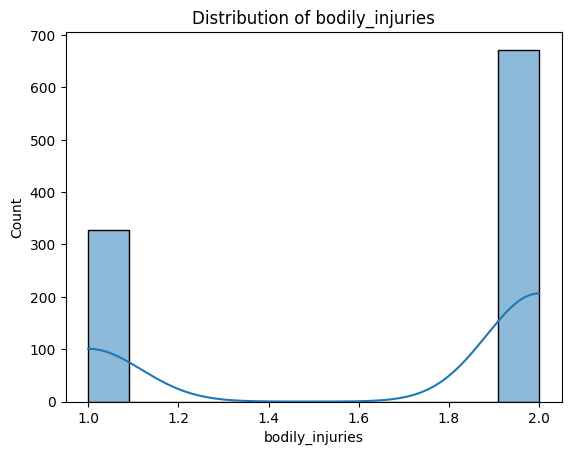

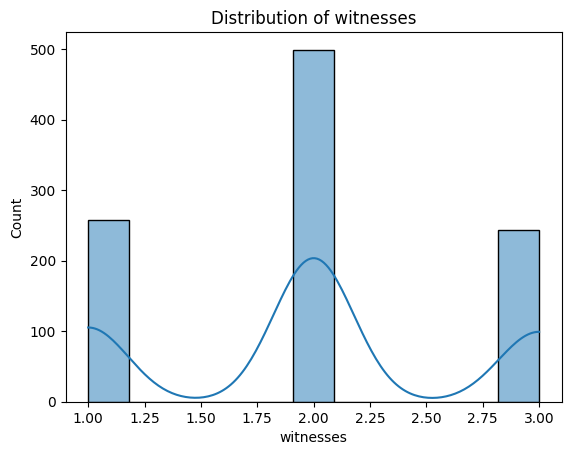

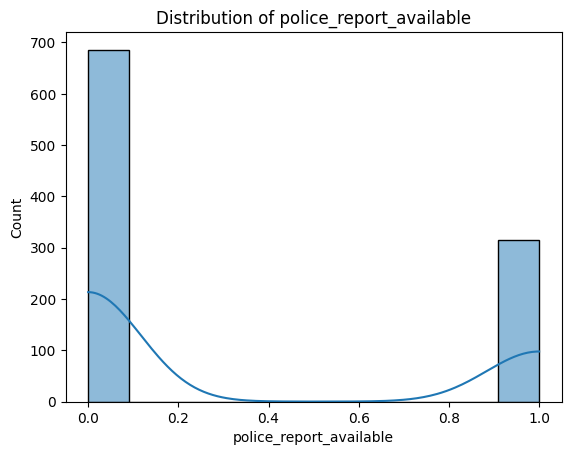

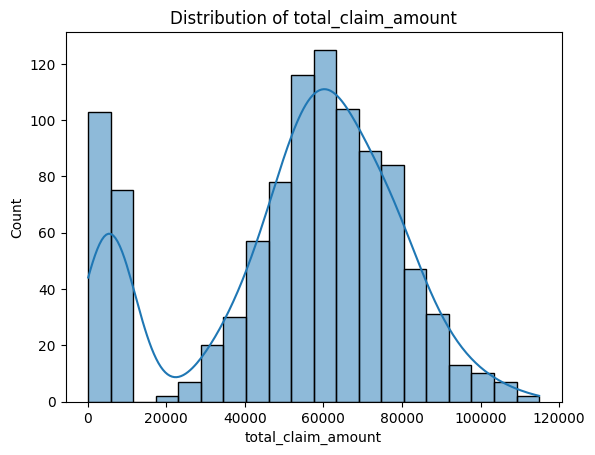

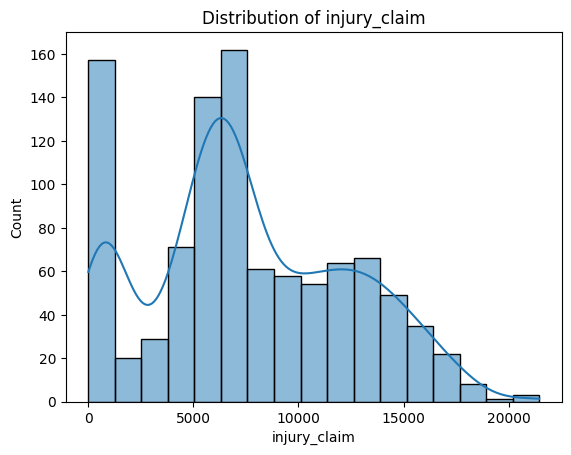

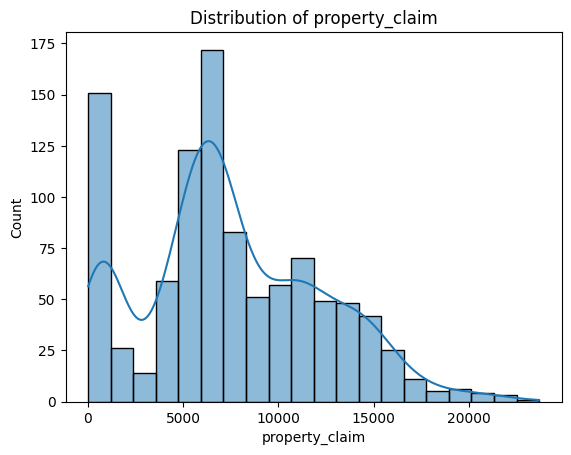

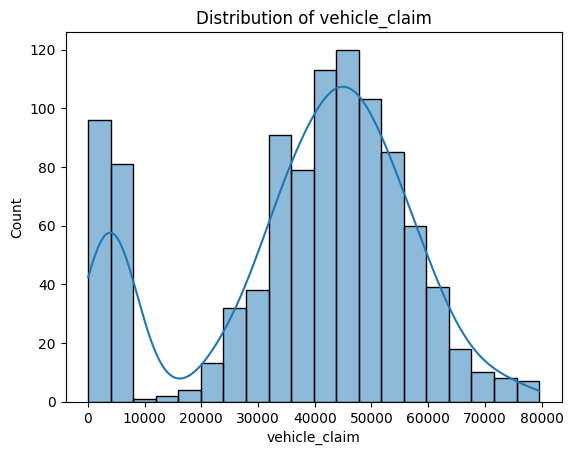

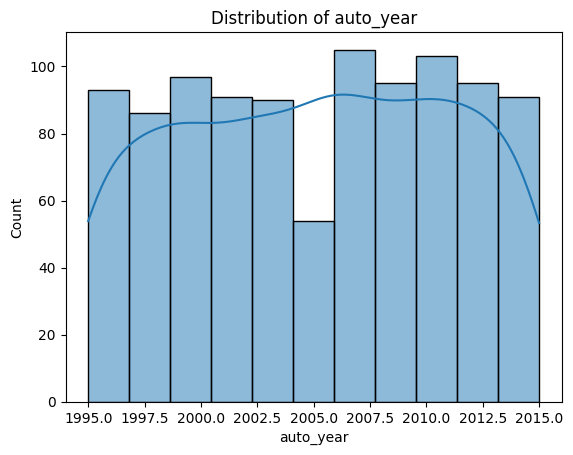

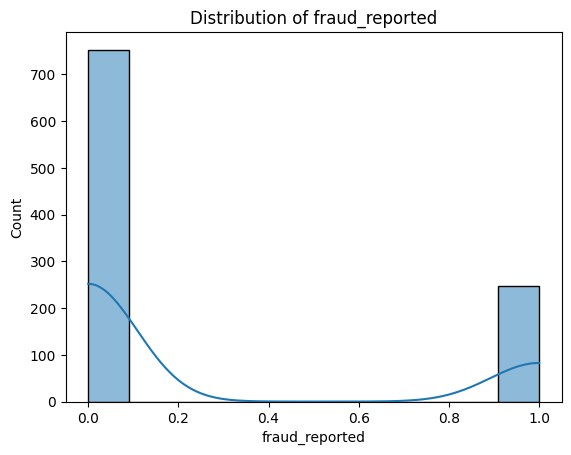

Skewness of numerical features:
 policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_relationship           0.077488
capital-gains                  0.066700
capital-loss                  -0.158614
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.301862
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.049346
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries               -0.733819
witnesses                      0.021304
police_report_available        0.802728
total_c

In [25]:
# Distribution
for feature in df:
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
    
# Check skewness
skewness = df.skew()
print('Skewness of numerical features:\n', skewness)

### Checking visualization presentation

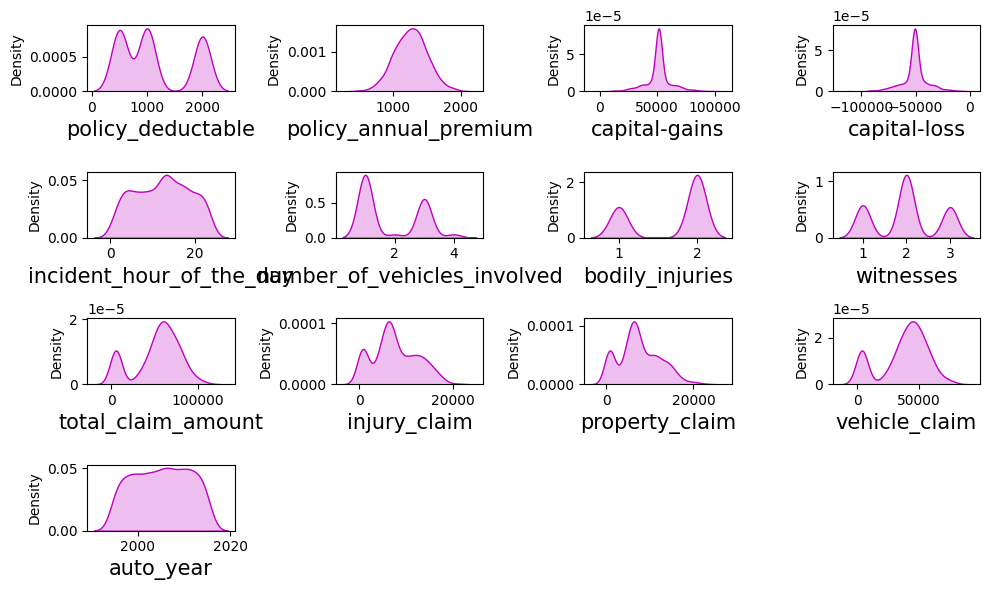

In [26]:
# checking the skewness.
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in num_df:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

##### Removing Skewness

In [27]:
# Removing the skewness by using Cube root square.
for col in num_df:
    if abs(skewness[col]) > 0.5:
        df[col] = np.cbrt(df[col])

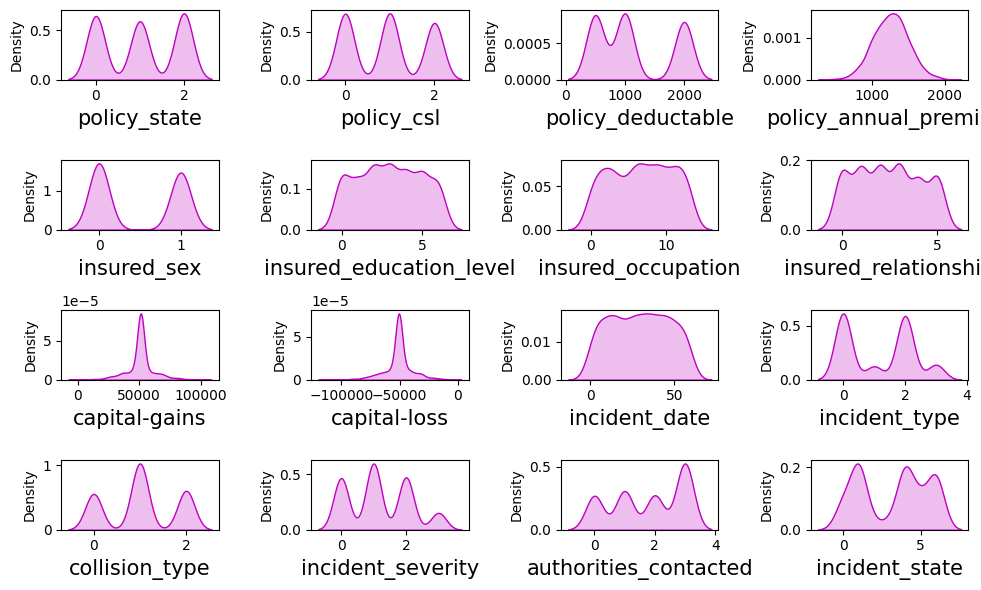

In [28]:
# Again checking the skewness.
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

#### Outlier Detection

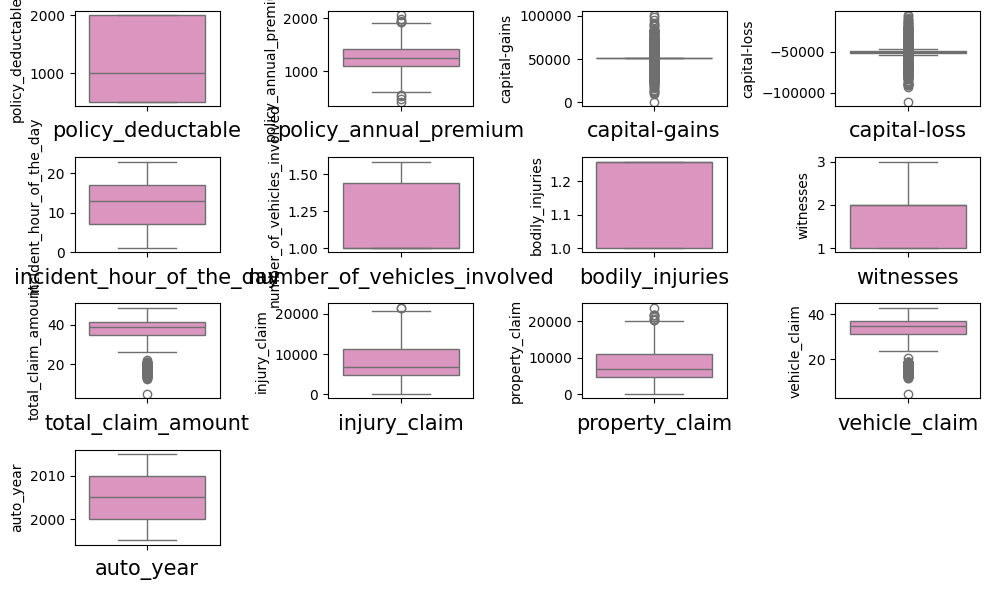

In [29]:
plt.figure(figsize=(10, 6), facecolor='White')
plotnumber = 1
for col in num_df:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [30]:
# Detecting and removing outliers using the IQR method.

# Function to remove outliers
def removing_outliers_from_iqr_method(df, columns):
    new_df = df.copy()
    for col in columns:
        Q1 = new_df[col].quantile(0.25)
        Q3 = new_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        new_df = new_df[(new_df[col] >= lower_bound) & (new_df[col] <= upper_bound)]
    return new_df

print("\nData shape before and after outlier removal:")
print("Before:", df.shape)

# Apply outlier removal
df = removing_outliers_from_iqr_method(df, df.columns)

print("After:", df.shape)


Data shape before and after outlier removal:
Before: (1000, 30)
After: (222, 30)


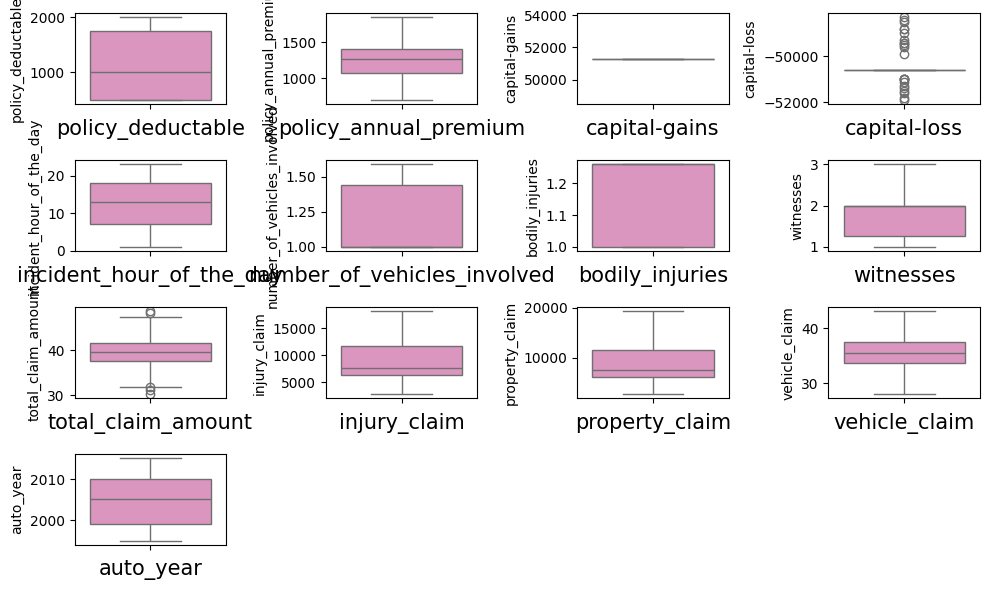

In [31]:
# Checking after removing the outliers.
plt.figure(figsize=(10, 6), facecolor='White')
plotnumber = 1
for col in num_df:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [32]:
# Removing outliers data columns.
df.drop(['capital-loss', 'capital-gains'], axis= 1, inplace= True)

In [33]:
# Displaying the dataset.
df

,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_date,incident_type,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
5,2.0,1.0,1000,1351.10,0.0,6.0,12.0,4.0,3.0,0.0,...,0.0,1.259921,2.0,0.0,40.020822,6410.0,6410.0,37.152041,2003,1.0
7,0.0,0.0,1000,1137.03,1.0,0.0,12.0,4.0,54.0,0.0,...,0.0,1.259921,2.0,1.0,37.226755,9380.0,9380.0,32.020170,2015,0.0
8,0.0,0.0,500,1442.99,0.0,6.0,7.0,3.0,58.0,2.0,...,0.0,1.000000,1.0,1.0,30.257050,2770.0,2770.0,28.088158,2012,0.0
11,2.0,0.0,2000,1137.16,0.0,2.0,3.0,2.0,30.0,0.0,...,1.0,1.000000,2.0,1.0,48.618162,17680.0,17680.0,43.009553,2006,0.0
12,2.0,2.0,500,1215.36,1.0,4.0,10.0,5.0,43.0,2.0,...,1.0,1.000000,2.0,0.0,38.376679,4710.0,9420.0,34.867526,2000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,1.0,0.0,500,1093.83,1.0,0.0,0.0,2.0,42.0,0.0,...,0.0,1.000000,1.0,0.0,37.628890,4440.0,8880.0,34.188115,2015,1.0
987,0.0,2.0,2000,1453.61,1.0,3.0,2.0,2.0,25.0,2.0,...,0.0,1.259921,3.0,0.0,39.218151,9280.0,9280.0,34.693930,2012,1.0
988,1.0,0.0,500,1672.88,0.0,2.0,1.0,5.0,34.0,2.0,...,1.0,1.000000,1.0,0.0,39.300333,12140.0,6070.0,34.894923,1997,0.0
995,2.0,2.0,1000,1310.80,0.0,5.0,2.0,4.0,44.0,2.0,...,1.0,1.259921,1.0,0.0,44.344405,17440.0,8720.0,39.373574,2006,0.0


# Correlation Matrix

In [34]:
# Calculate the correlation matrix
corr = df.corr()
corr

,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_date,incident_type,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
policy_state,1.000000,0.099894,0.069889,0.109249,-0.035526,0.063383,-0.000544,-0.028124,0.029901,-0.122379,...,-0.022019,-1.672943e-01,0.038397,-0.022460,0.061675,-0.096058,0.113196,0.099109,-0.110355,9.502841e-02
policy_csl,0.099894,1.000000,-0.064228,0.108294,0.029550,0.008337,0.024198,-0.100254,0.081131,0.078884,...,0.029407,1.060660e-01,0.122694,-0.008544,-0.007860,-0.019673,-0.014484,-0.003827,-0.015863,1.172337e-01
policy_deductable,0.069889,-0.064228,1.000000,-0.004176,-0.118032,0.054299,-0.056678,-0.080017,-0.046746,-0.087401,...,0.025648,2.703354e-02,0.085748,0.019671,0.101819,0.065054,0.101656,0.083504,-0.042679,-9.408352e-02
policy_annual_premium,0.109249,0.108294,-0.004176,1.000000,0.115865,-0.001387,0.055504,0.093099,-0.041259,-0.055502,...,0.033128,-6.390593e-02,-0.064075,0.002324,0.062874,0.019067,0.029808,0.053141,-0.049072,-2.526088e-02
insured_sex,-0.035526,0.029550,-0.118032,0.115865,1.000000,-0.040492,-0.048475,0.082202,0.013059,0.015606,...,0.002982,1.279268e-02,0.016619,-0.030056,0.005111,-0.005646,-0.041703,0.008278,-0.007392,6.697242e-02
insured_education_level,0.063383,0.008337,0.054299,-0.001387,-0.040492,1.000000,-0.042306,0.108774,-0.017374,0.059316,...,-0.033948,-6.674142e-02,-0.085093,0.051433,0.091594,-0.030591,0.059079,0.099739,0.095162,7.999549e-02
insured_occupation,-0.000544,0.024198,-0.056678,0.055504,-0.048475,-0.042306,1.000000,0.074258,-0.068422,0.084401,...,0.009592,1.570063e-01,0.119392,-0.058038,-0.040272,0.014869,0.021553,-0.064082,-0.112562,2.165643e-02
insured_relationship,-0.028124,-0.100254,-0.080017,0.093099,0.082202,0.108774,0.074258,1.000000,0.010939,0.093724,...,0.013277,7.975169e-02,-0.148527,0.109518,0.075889,0.025087,0.040217,0.065363,-0.047015,-2.640170e-02
incident_date,0.029901,0.081131,-0.046746,-0.041259,0.013059,-0.017374,-0.068422,0.010939,1.000000,0.059275,...,0.055179,-6.305675e-02,-0.041360,0.010134,0.016769,-0.046769,0.059372,0.005190,0.001701,-6.077190e-02
incident_type,-0.122379,0.078884,-0.087401,-0.055502,0.015606,0.059316,0.084401,0.093724,0.059275,1.000000,...,0.145360,5.109553e-02,-0.043215,0.043046,0.051356,-0.021498,0.044820,0.069396,-0.022840,6.470804e-02


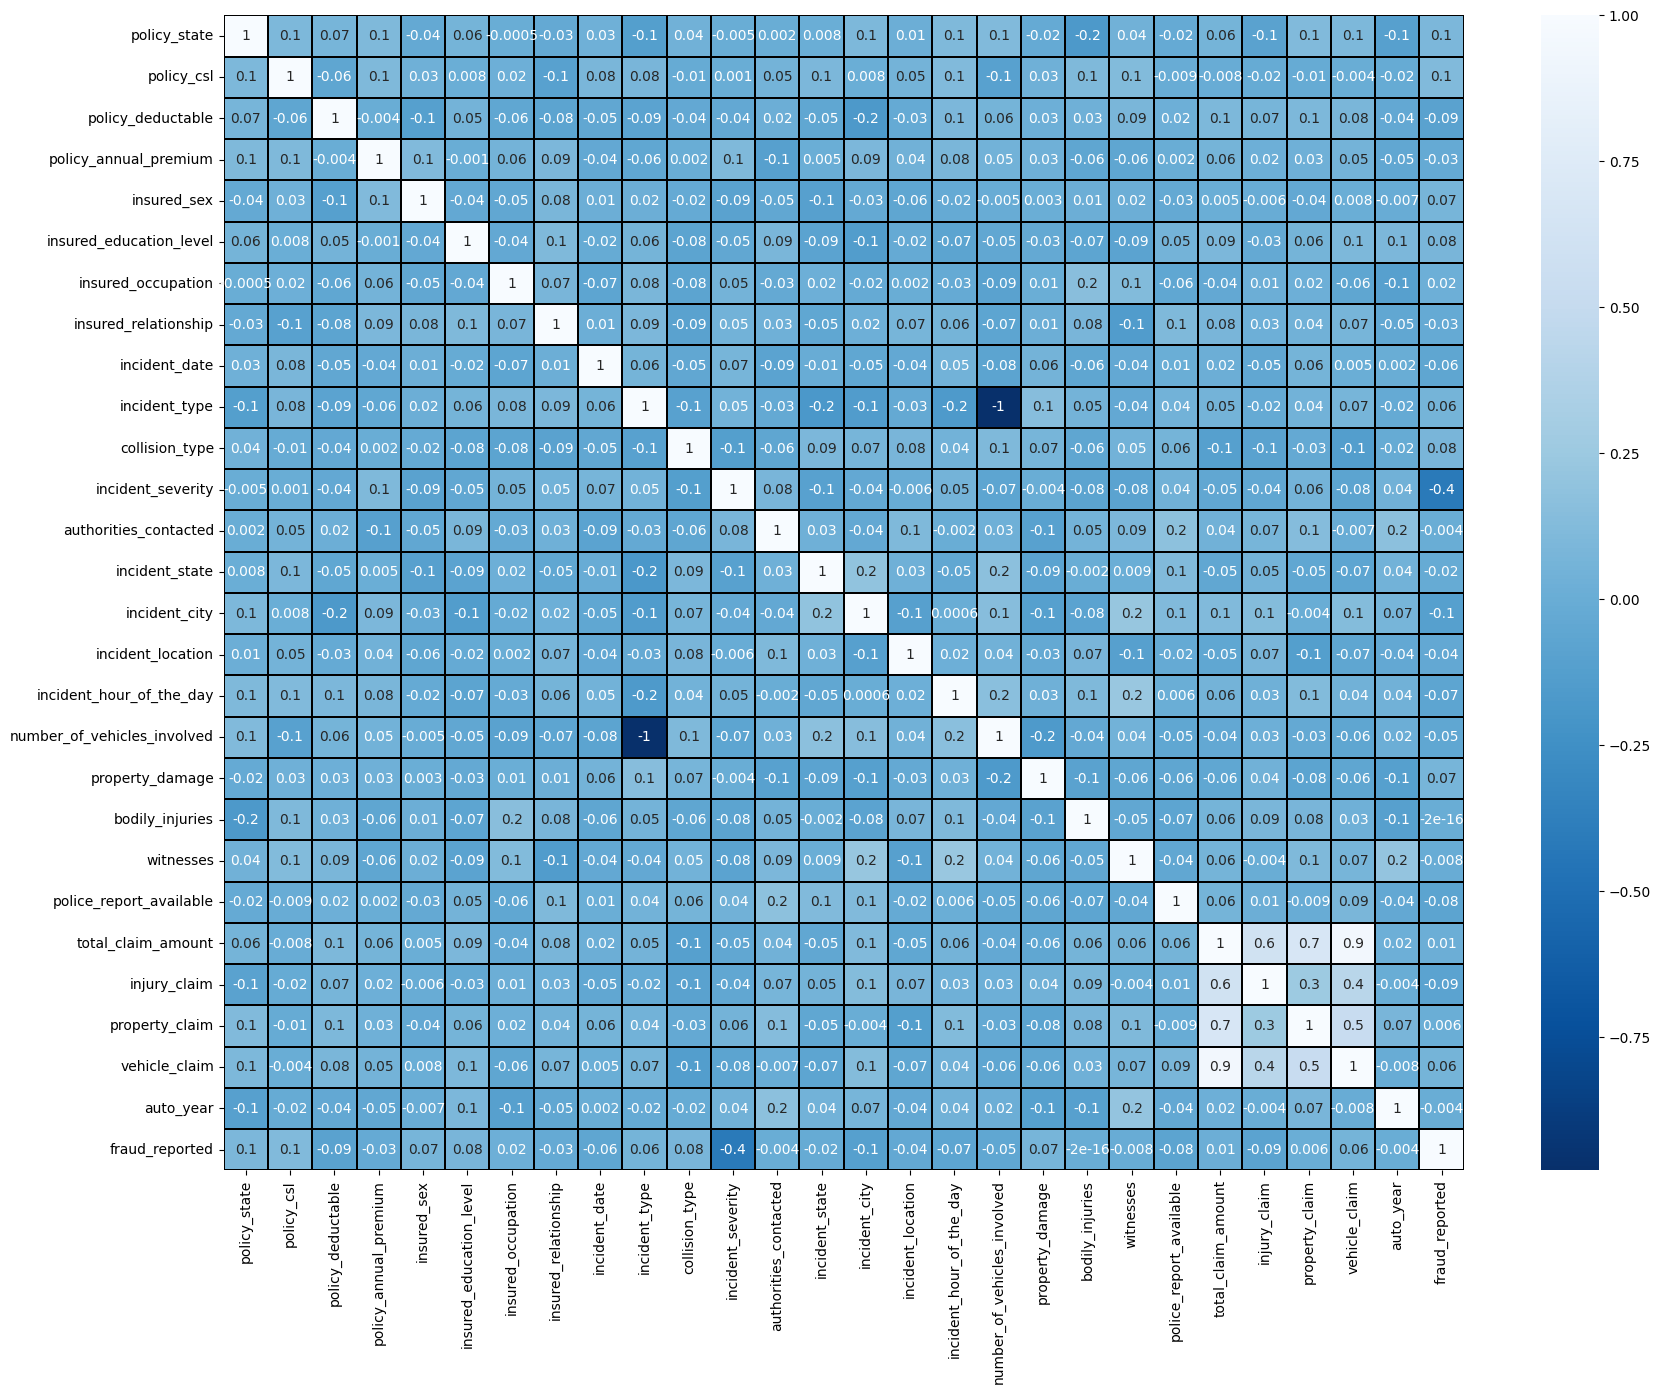

In [35]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation = 0)

plt.show()

#### When two independent features are highly correlated, we can drop one of the columns.

### We can clearly see that there is no positive correlation with the target value, but there might be highly negative correlation with the target value. So, let's see in further investigation.

In [36]:
corr['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000e+00
policy_csl                     1.172337e-01
policy_state                   9.502841e-02
insured_education_level        7.999549e-02
collision_type                 7.977277e-02
property_damage                6.741703e-02
insured_sex                    6.697242e-02
incident_type                  6.470804e-02
vehicle_claim                  5.709560e-02
insured_occupation             2.165643e-02
total_claim_amount             1.203402e-02
property_claim                 6.274804e-03
bodily_injuries               -1.541888e-16
auto_year                     -4.166045e-03
authorities_contacted         -4.258138e-03
witnesses                     -8.367219e-03
incident_state                -1.903982e-02
policy_annual_premium         -2.526088e-02
insured_relationship          -2.640170e-02
incident_location             -4.006748e-02
number_of_vehicles_involved   -5.473006e-02
incident_date                 -6.077190e-02
incident_hour_of_the_day      -7

In [37]:
# Separating feature and label
x = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

In [38]:
# Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [39]:
# Checking Variance Inflation Factor(VIF)
# Checking VIF values to confirm whether multicollinearity exists or not.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Feature Values'] = x.columns

#### So, we can clearly see that there are multicollinearity present, so we need to drop columns.

In [40]:
# Displaying the vif values
vif

,VIF Values,Feature Values
0,1.193680,policy_state
1,1.160148,policy_csl
2,1.172133,policy_deductable
3,1.137617,policy_annual_premium
4,1.102531,insured_sex
5,1.138790,insured_education_level
6,1.150866,insured_occupation
7,1.166272,insured_relationship
8,1.084218,incident_date
9,26.101794,incident_type


### We need to drop the columns which have vif values more than 10.

In [41]:
df.drop(['total_claim_amount', 'number_of_vehicles_involved'], axis = 1, inplace = True)

In [42]:
# Again separating feature and label
x = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

In [43]:
# Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [44]:
# Checking Variance Inflation Factor(VIF)
# Checking VIF values to confirm whether multicollinearity exists or not.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Feature Values'] = x.columns

In [45]:
# Displaying the vif values
vif

,VIF Values,Feature Values
0,1.182156,policy_state
1,1.143504,policy_csl
2,1.147150,policy_deductable
3,1.129210,policy_annual_premium
4,1.096405,insured_sex
5,1.123286,insured_education_level
6,1.142206,insured_occupation
7,1.145474,insured_relationship
8,1.064986,incident_date
9,1.201820,incident_type


In [46]:
# Now we can move to the model building
y.value_counts()

fraud_reported
0.0    159
1.0     63
Name: count, dtype: int64

### We can see that there is class imbalance in the target values, so we need to address it by using an oversampling method.

### OverSampling

In [47]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x,y)

In [48]:
# Checking again
y.value_counts()

fraud_reported
0.0    159
1.0     63
Name: count, dtype: int64

In [49]:
# We have resolved the class imbalance issue by using oversampling method.
y1.value_counts()

fraud_reported
1.0    159
0.0    159
Name: count, dtype: int64

### Modelling

In [50]:
# Classification Algorithmfrom 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [51]:
# Just finding the value random State after that you can comment these line of code.
maxAcc = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    ETC = RandomForestClassifier()
    ETC.fit(x_train, y_train)
    pred = ETC.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRs = i
print("Best Accuracy is ", maxAcc, "at random_state ", maxRs)

Best Accuracy is  0.9375 at random_state  34


In [52]:
# Creating train test split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=.30, random_state=maxRs)

# RandomForestClassifier

In [53]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)

In [54]:
print("Accuracy of this model ", accuracy_score(y_test, predRFC)*100)

print(confusion_matrix(y_test, predRFC))

print(classification_report(y_test, predRFC))

Accuracy of this model  93.75
[[43  3]
 [ 3 47]]
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        46
         1.0       0.94      0.94      0.94        50

    accuracy                           0.94        96
   macro avg       0.94      0.94      0.94        96
weighted avg       0.94      0.94      0.94        96



In [55]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(RFC, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predRFC) - score.mean()

[0.8125     0.78125    0.90625    0.95238095 0.9047619 ]
0.8714285714285716


0.06607142857142845

# ExtraTreesClassifier

In [56]:
# Checking accuracy for ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predET)*100)

print(confusion_matrix(y_test, predET))

print(classification_report(y_test, predET))

Accuracy of this model  90.625
[[42  4]
 [ 5 45]]
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90        46
         1.0       0.92      0.90      0.91        50

    accuracy                           0.91        96
   macro avg       0.91      0.91      0.91        96
weighted avg       0.91      0.91      0.91        96



In [57]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(ET, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predET) - score.mean()

[0.8125     0.84375    0.90625    0.95238095 0.92063492]
0.8871031746031747


0.01914682539682533

# GradientBoostingClassifier

In [58]:
# Checking accuracy for GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
predGBC = GBC.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predGBC)*100)

print(confusion_matrix(y_test, predGBC))

print(classification_report(y_test, predGBC))

Accuracy of this model  90.625
[[40  6]
 [ 3 47]]
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90        46
         1.0       0.89      0.94      0.91        50

    accuracy                           0.91        96
   macro avg       0.91      0.90      0.91        96
weighted avg       0.91      0.91      0.91        96



In [59]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(GBC, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predGBC) - score.mean()

[0.765625   0.78125    0.875      0.95238095 0.88888889]
0.8526289682539684


0.05362103174603161

# BaggingClassifier

In [60]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predBC)*100)

print(confusion_matrix(y_test, predBC))

print(classification_report(y_test, predBC))

Accuracy of this model  86.45833333333334
[[39  7]
 [ 6 44]]
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86        46
         1.0       0.86      0.88      0.87        50

    accuracy                           0.86        96
   macro avg       0.86      0.86      0.86        96
weighted avg       0.86      0.86      0.86        96



In [61]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(BC, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predBC) - score.mean()

[0.65625    0.75       0.84375    0.96825397 0.9047619 ]
0.8246031746031747


0.0399801587301587

# LogisticRegression

In [62]:
# Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predLR)*100)

print(confusion_matrix(y_test, predLR))

print(classification_report(y_test, predLR))

Accuracy of this model  84.375
[[37  9]
 [ 6 44]]
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83        46
         1.0       0.83      0.88      0.85        50

    accuracy                           0.84        96
   macro avg       0.85      0.84      0.84        96
weighted avg       0.84      0.84      0.84        96



In [63]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(LR, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predLR) - score.mean()

[0.71875    0.8125     0.75       0.77777778 0.73015873]
0.7578373015873016


0.08591269841269844

# SVC

In [64]:
# Checking accuracy for SVC
SV = SVC()
SV.fit(x_train, y_train)
predSV = SV.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predSV)*100)

print(confusion_matrix(y_test, predSV))

print(classification_report(y_test, predSV))

Accuracy of this model  87.5
[[41  5]
 [ 7 43]]
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87        46
         1.0       0.90      0.86      0.88        50

    accuracy                           0.88        96
   macro avg       0.88      0.88      0.87        96
weighted avg       0.88      0.88      0.88        96



In [65]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(SV, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predSV) - score.mean()

[0.796875   0.859375   0.875      0.92063492 0.79365079]
0.8491071428571428


0.025892857142857162

### As you can see our best model is RandomForestClassifier and ExtraTreesClassifier are the best model.

In [66]:
import joblib

# Save the trained model
joblib.dump(RFC, 'insurance_claim_fraud_detection.pkl')

print("Model saved successfully.")

Model saved successfully.


In [67]:
# Predicting the saved model
model = joblib.load('insurance_claim_fraud_detection.pkl')
prediction = model.predict(x_test)

In [68]:
# Confirming
a = np.array(y_test)
predicted_df = pd.DataFrame()
predicted_df['Predict'] = prediction
predicted_df['Original'] = a
predicted_df

,Predict,Original
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0
...,...,...
91,1.0,1.0
92,0.0,0.0
93,1.0,1.0
94,0.0,0.0
